## Compile Form in order to run the notebook

Forms provide an easy way to parameterize code. From a code cell, select Insert → Add form field. When you change the value in a form, the corresponding value in the code will change.

In [ ]:
#@title Compile this form to run notebook:
import os

#@markdown ---
#@markdown ##### Enter Root path:
root_path = "/content/drive/My Drive/Siren Deep Learning Analyses/results" # @param ["/content/", "/content/drive/My Drive/Siren Deep Learning Analyses/results"]

#@markdown ---
#@markdown ##### Enter date and timestamp values:
# date_input = '2018-03-23' #@param {type:"date"}
date_input = '2020-10-16' #@param {type:"date"}
train_timestamp = "1602876519.165714" #@param {type:"string"}



#@markdown ---
#@markdown ##### Enter trial number:
train_no =  2 #@param {type:"integer", min:0, max:23, step:1}

#@markdown ---
#@markdown ##### Toggle checkbox to download resulting pictures:
download_pictures_checkbox = False #@param {type:"boolean"}

#@markdown ---
#@markdown ##### Enter dirname and image name:
dir_image = "/content/drive/My Drive/Siren Deep Learning Analyses/testsets/BSD68" # @param ["/content/", "/content/drive/My Drive/Siren Deep Learning Analyses/testsets/BSD68"]
image_name = "test001.png" #@param {type:"string"}

## Setup

### Installations

In [ ]:
!pip install -q gwpy

In [ ]:
# Clean /content from trash or old .png images
!rm -f /content/*.png

### Imports

In [ ]:
from datetime import datetime
from google.colab import files

from pathlib import Path

import psycopg2 as ps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import ipywidgets as widgets
# back end of ipywidgets
from IPython.display import display

import collections
import functools
import glob
import operator
import os
import re
import numpy as np
import pandas as pd

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### Functions

In [ ]:
def graphics_bars_pointplot(dataframe, y_axes, x_axis, grid_shape, palette="Blues_d", axes = None, figsize = (15, 5), show_fig = False, title = 'Complex Plot'):
    fig, axes = plt.subplots(*grid_shape, figsize=figsize)
    fig.suptitle(f'{title}', fontsize=15)

    pos = 0
    try:
        axes_list = functools.reduce(operator.iconcat, axes, [])
    except:
        axes_list = axes

    _ = graphics_scatterplot(
        dataframe = dataframe,
        y_axes = y_axes,
        axes = axes_list[len(y_axes) * pos:len(y_axes) * (pos+1)],
        x_axis = x_axis)
    """
    for ax in axes_list[len(y_axes) * pos:len(y_axes) * (pos+1)]:
        ax.get_xaxis().set_visible(False)
    """
    pos += 1

    _ = graphics_bars_mean_std(
        dataframe = dataframe,
        y_axes = y_axes,
        axes = axes_list[len(y_axes) * pos:len(y_axes) * (pos+1)],
        x_axis = x_axis)
    
    for ax in axes_list[len(y_axes) * pos:len(y_axes) * (pos+1)]:
        ax.get_xaxis().set_visible(False)
    pos += 1
    
    _ = graphics_pointplot_mean_std(
        dataframe = dataframe,
        y_axes = y_axes,
        axes = axes_list[len(y_axes) * pos:len(y_axes) * (pos+1)],
        x_axis = x_axis)

    for ax in axes_list[len(y_axes) * pos:len(y_axes) * (pos+1)]:
        ax.get_xaxis().set_visible(False)
    pos += 1
    
    _ = graphics_regplot_mean_std(
        dataframe = dataframe,
        y_axes = y_axes,
        axes = axes_list[len(y_axes) * pos:len(y_axes) * (pos+1)],
        x_axis = x_axis)
    
    for ax in axes_list[len(y_axes) * pos:len(y_axes) * (pos+1)]:
        ax.get_xaxis().set_visible(False)
    pos += 1

    _ = graphics_boxplot(
        dataframe = dataframe,
        y_axes = y_axes,
        axes = axes_list[len(y_axes) * pos:len(y_axes) * (pos+1)],
        x_axis = x_axis)


    for ax in axes_list[len(y_axes) * pos:len(y_axes) * (pos+1)]:
        ax.get_xaxis().set_visible(False)
    pos += 1
    
    _ = graphics_violinplot(
        dataframe = dataframe,
        y_axes = y_axes,
        axes = axes_list[len(y_axes) * pos:len(y_axes) * (pos+1)],
        x_axis = x_axis)

    return fig, axes

In [ ]:
def graphics_scatterplot(dataframe, y_axes, x_axis, grid_shape = None, palette="Blues_d", axes = None, figsize = (15, 5), show_fig = False, title = 'Complex Plot'):
    flag = False
    fig = None
    if axes is None:
        fig, axes = plt.subplots(*grid_shape, figsize=figsize)
        fig.suptitle(f'{title}', fontsize=15)
        flag = True
        pass

    data_xtick_arr = \
        np.array(
            np.unique(dataframe[f"{x_axis}"].values),
            dtype=np.int
    )

    try:
        axes_list = functools.reduce(operator.iconcat, axes, [])
    except:
        axes_list = axes
    for ii, (ax, y_axis) in enumerate(zip(axes_list, y_axes)):
        # _ = sns.regplot(x=f"{x_axis}", y=(f"{y_axis}"), data=dataframe, order=1, ax = ax, marker = 'x', color = 'black', label = 'poly order 1°')
        # _ = sns.regplot(x=f"{x_axis}", y=(f"{y_axis}"), data=dataframe, order=2, ax = ax, marker = 'x', color = 'black', label = 'poly order 2°')

        _ = sns.scatterplot(x=f"{x_axis}", y=(f"{y_axis}"), data=dataframe, ax = ax, marker = 'x', color = sns.color_palette()[ii])
        # axes[0].get_yaxis().set_visible(False)
        ax.set_title(f'{y_axis.upper()}', fontsize=10)
        # ax.set_xticklabels(data_xtick_arr, rotation=45)
        # ax.set_xticklabels(data_xtick_arr, rotation=45)
        ax.set_xscale('log')
        pass

    # plt.tight_layout()
    if flag is False:
        return axes
    else:
        # plt.tight_layout()
        if show_fig: plt.show()
        return fig, axes

In [ ]:
def graphics_violinplot(dataframe, y_axes, x_axis, grid_shape = None, palette="Blues_d", axes = None, figsize = (15, 5), show_fig = False, title = 'Complex Plot'):
    flag = False
    fig = None
    if axes is None:
        fig, axes = plt.subplots(*grid_shape, figsize=figsize)
        fig.suptitle(f'{title}', fontsize=15)
        flag = True
        pass

    data_xtick_arr = \
        np.array(
            np.unique(dataframe[f"{x_axis}"].values),
            dtype=np.int
    )

    try:
        axes_list = functools.reduce(operator.iconcat, axes, [])
    except:
        axes_list = axes
    for ax, y_axis in zip(axes_list, y_axes):
        _ = sns.violinplot(x=f"{x_axis}", y=(f"{y_axis}"), data=dataframe, ax = ax, palette="Set3", bw=.2, cut=1, linewidth=1)
        # axes[0].get_yaxis().set_visible(False)
        ax.set_title(f'{y_axis.upper()}', fontsize=10)
        ax.set_xticklabels(data_xtick_arr, rotation=45)
        # ax.set_yscale('log')
        pass

    # plt.tight_layout()
    if flag is False:
        return axes
    else:
        # plt.tight_layout()
        if show_fig: plt.show()
        return fig, axes

In [ ]:
def graphics_boxplot(dataframe, y_axes, x_axis, grid_shape = None, palette="Blues_d", axes = None, figsize = (15, 5), show_fig = False, title = 'Complex Plot'):
    flag = False
    fig = None
    if axes is None:
        fig, axes = plt.subplots(*grid_shape, figsize=figsize)
        fig.suptitle(f'{title}', fontsize=15)
        flag = True
        pass

    data_xtick_arr = \
        np.array(
            np.unique(dataframe[f"{x_axis}"].values),
            dtype=np.int
    )

    try:
        axes_list = functools.reduce(operator.iconcat, axes, [])
    except:
        axes_list = axes
    for ax, y_axis in zip(axes_list, y_axes):
        _ = sns.boxplot(x=f"{x_axis}", y=(f"{y_axis}"),
            data=dataframe,
            palette=palette, ax = ax)
        # axes[0].get_yaxis().set_visible(False)
        ax.set_title(f'{y_axis.upper()}', fontsize=10)
        ax.set_xticklabels(data_xtick_arr, rotation=45)
        # ax.set_yscale('log')
        pass

    # plt.tight_layout()
    if flag is False:
        return axes
    else:
        # plt.tight_layout()
        if show_fig: plt.show()
        return fig, axes

In [ ]:
def graphics_bars_mean_std(dataframe, y_axes, x_axis, grid_shape = None, palette="Blues_d", axes = None, figsize = (15, 5), show_fig = False, title = 'Complex Plot'):
    flag = False
    fig = None
    if axes is None:
        fig, axes = plt.subplots(*grid_shape, figsize=figsize)
        fig.suptitle(f'{title}', fontsize=15)
        flag = True
        pass

    data_xtick_arr = \
        np.array(
            np.unique(dataframe[f"{x_axis}"].values),
            dtype=np.int
    )

    try:
        axes_list = functools.reduce(operator.iconcat, axes, [])
    except:
        axes_list = axes
    for ax, y_axis in zip(axes_list, y_axes):
        _ = sns.barplot(x=f"{x_axis}", y=(f"{y_axis}"),
            data=dataframe,
            palette=palette,
            capsize=.0, ax = ax)
        # axes[0].get_yaxis().set_visible(False)
        ax.set_title(f'{y_axis.upper()} (mean+std)', fontsize=10)
        ax.set_xticklabels(data_xtick_arr, rotation=45)

    # plt.tight_layout()
    if flag is False:
        return axes
    else:
        # plt.tight_layout()
        if show_fig: plt.show()
        return fig, axes

In [ ]:
def graphics_pointplot_mean_std(dataframe, y_axes, x_axis, grid_shape = None, palette=None, axes = None, figsize = (15, 5), show_fig = False, title = 'Complex Plot'):
    flag = False
    fig = None
    if axes is None:
        fig, axes = plt.subplots(*grid_shape, figsize=figsize)
        fig.suptitle(f'{title}', fontsize=15)
        flag = True
        pass

    data_xtick_arr = \
        np.array(
            np.unique(results_history_sorted_df[f"{x_axis}"].values),
            dtype=np.int
    )

    try:
        axes_list = functools.reduce(operator.iconcat, axes, [])
    except:
        axes_list = axes
    for ax, y_axis in zip(axes_list, y_axes):
        
        _ = sns.pointplot(x=f"{x_axis}", y=(f"{y_axis}"),
            data=dataframe,
            palette=palette,
            capsize=.0, ax = ax)
        # axes[0].get_yaxis().set_visible(False)
        ax.set_title(f'{y_axis.upper()} (mean+std)', fontsize=10)
        # ax.set_xticklabels(data_xtick_arr, rotation=45)
        ax.set_xscale('log')
        pass
    
    if flag is False:
        return axes
    else:
        # plt.tight_layout()
        if show_fig: plt.show()
        return fig, axes

In [ ]:
def graphics_regplot_mean_std(dataframe, y_axes, x_axis, grid_shape = None, palette=None, axes = None, figsize = (15, 5), show_fig = False, title = 'Complex Plot'):
    flag = False
    fig = None
    if axes is None:
        fig, axes = plt.subplots(*grid_shape, figsize=figsize)
        fig.suptitle(f'{title}', fontsize=15)
        flag = True
        pass

    data_xtick_arr = \
        np.array(
            np.unique(dataframe[f"{x_axis}"].values),
            dtype=np.int
    )

    try:
        axes_list = functools.reduce(operator.iconcat, axes, [])
    except:
        axes_list = axes
    for ax, y_axis in zip(axes_list, y_axes):
        """
        _ = sns.regplot(x=f"{x_axis}", y=(f"{y_axis}"),
            data=dataframe, color = 'red', label = 'y_axis.upper()', ax = ax)
        """
        _ = sns.regplot(x=f"{x_axis}", y=(f"{y_axis}"), data=dataframe,
                label = f'{y_axis.upper()}',
                # scatter_kws={"s": 80},
                x_estimator=np.mean,
                ax = ax,
                order=4, ci=68)
        # axes[0].get_yaxis().set_visible(False)
        ax.set_title(f'{y_axis.upper()} | poly-regression order 4°', fontsize=10)
        # ax.set_xticklabels(data_xtick_arr, rotation=45)

    
    if flag is False:
        return axes
    else:
        # plt.tight_layout()
        if show_fig: plt.show()
        return fig, axes

In [ ]:
def test_concat_arrays():
    res = np.concatenate(([[0, 1, 2]], [[3,4,5]]), axis = 0)
    res_2 = np.concatenate((res, [[5, 6, 7]]), axis = 0)
    res_2
    res_2.mean(axis = 0)
    res_3 = np.concatenate((res_2, [[8, 9, 10]]), axis = 0)
    res_3
    res_3.mean(axis = 0)
    pass

## Code

### Fetch Data

In [ ]:
date_input_tmp = '-'.join([xx for xx in date_input.split('-')[::-1]])
train_timestamp_tmp = train_timestamp.replace('.', '-')
train_datetime = os.path.join(date_input_tmp, train_timestamp_tmp)

# print('Date train:', train_datetime)

if root_path == "/content":
    path_history_train = os.path.join(
        root_path,
        f'result_comb_train_{train_no}.txt')
else:
    path_history_train = os.path.join(
        root_path,
        train_datetime,
        "train",
        f'result_comb_train_{train_no}.txt')

print("Path location:")
print(path_history_train)

Path location:
/content/drive/My Drive/Siren Deep Learning Analyses/results/16-10-2020/1602876519-165714/train/result_comb_train_2.txt


In [ ]:
columns_df = ['#params', 'seed', 'hl', 'hf', 'mse', 'psnr', 'ssim', 'train_eta']

results_history_arr = np.loadtxt(path_history_train)

results_history_df = pd.DataFrame(
    data = results_history_arr,
    columns = columns_df)

### Dataframe: brief description

In [ ]:
results_history_df.head(5)

,#params,seed,hl,hf,mse,psnr,ssim,train_eta
0,198401.0,0.0,3.0,256.0,0.007485,21.258195,0.756143,1153.064878
1,198401.0,0.0,3.0,256.0,0.007485,21.258195,0.756143,1143.219142
2,198401.0,0.0,3.0,256.0,0.007485,21.258195,0.756143,1147.886361


In [ ]:
results_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   #params    3 non-null      float64
 1   seed       3 non-null      float64
 2   hl         3 non-null      float64
 3   hf         3 non-null      float64
 4   mse        3 non-null      float64
 5   psnr       3 non-null      float64
 6   ssim       3 non-null      float64
 7   train_eta  3 non-null      float64
dtypes: float64(8)
memory usage: 320.0 bytes


In [ ]:
results_history_df.describe()

,#params,seed,hl,hf,mse,psnr,ssim,train_eta
count,3.0,3.0,3.0,3.0,3.000000,3.000000,3.000000,3.000000
mean,198401.0,0.0,3.0,256.0,0.007485,21.258195,0.756143,1148.056794
std,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,4.925080
min,198401.0,0.0,3.0,256.0,0.007485,21.258195,0.756143,1143.219142
25%,198401.0,0.0,3.0,256.0,0.007485,21.258195,0.756143,1145.552752
50%,198401.0,0.0,3.0,256.0,0.007485,21.258195,0.756143,1147.886361
75%,198401.0,0.0,3.0,256.0,0.007485,21.258195,0.756143,1150.475619
max,198401.0,0.0,3.0,256.0,0.007485,21.258195,0.756143,1153.064878


In [ ]:
collections.Counter(results_history_df["hf"].values)

Counter({256.0: 3})

### Dataframe: in depth description

#### Scatter - Plot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserW

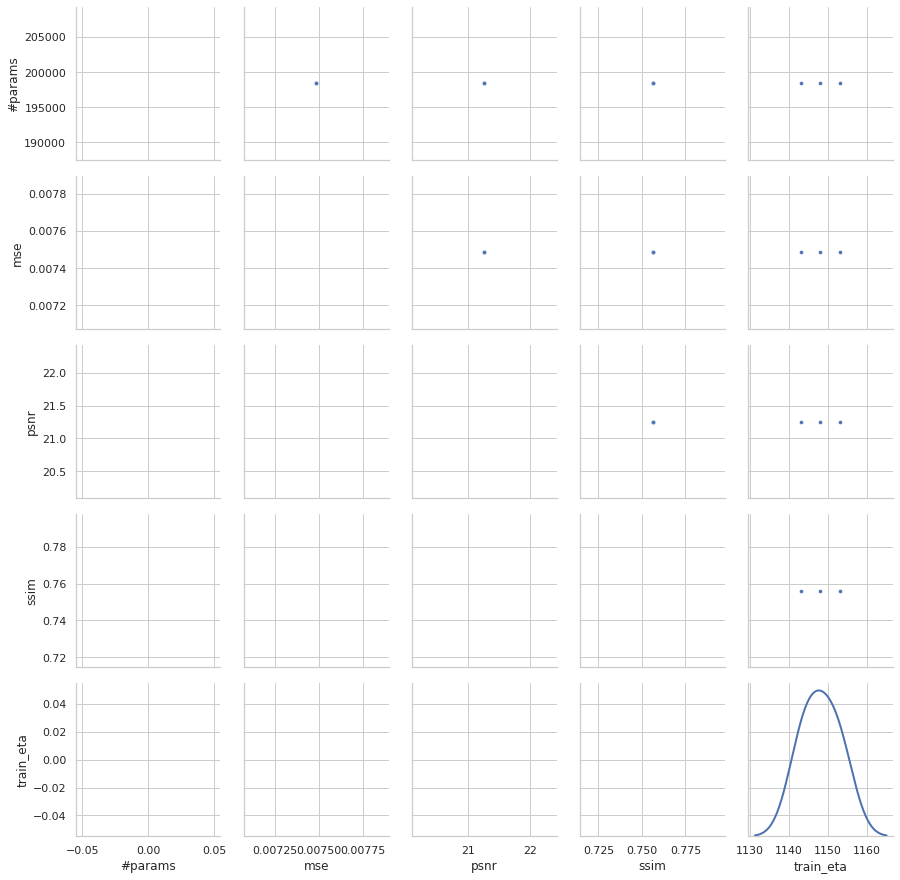

In [ ]:
# sns.pairplot(results_history_df)
g = sns.PairGrid(results_history_df.drop(['hf', 'hl', 'seed'], axis = 1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15) # 
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
plt.savefig(f'scatter_plot_train_no_{train_no}.png')

#### Plots

In [ ]:
# Compute Mean and Standard-Deviation for MSE and PSNR
# with respect to data grouped by means of'#params'-attribute
#  within dataframe object: 'results_history_df

results_history_df.groupby(by = ['#params'])[['mse', 'psnr', 'ssim', 'train_eta']]\
    .describe()[[
                ("mse", "mean"), ("mse", "std"),
                ("psnr", "mean"), ("psnr", "std"),
                ("ssim", "mean"), ("ssim", "std"),
                ("train_eta", "mean"), ("train_eta", "std")
                ]]

mse            psnr           ssim         train_eta         
              mean  std       mean  std      mean  std         mean      std
#params                                                                     
198401.0  0.007485  0.0  21.258195  0.0  0.756143  0.0  1148.056794  4.92508

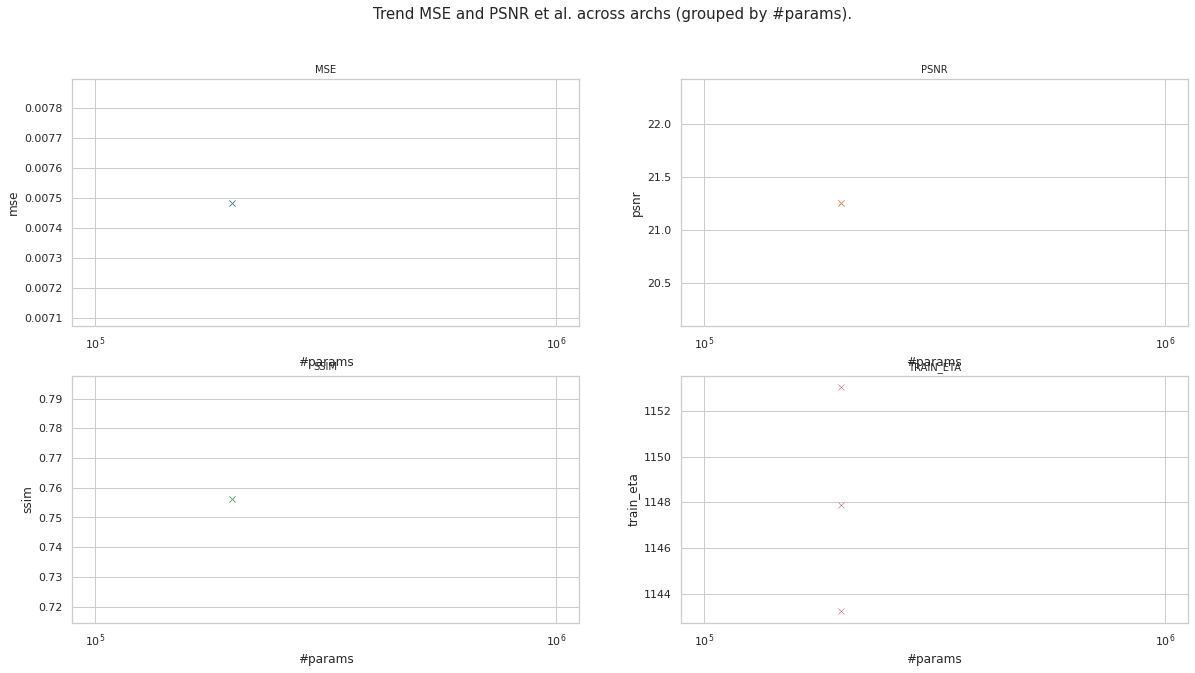

In [ ]:
grid_shape = "(2, 2)" #@param ["(1, 4)", "(4, 1)", "(2, 2)"]
grid_shape = eval(grid_shape)

fig, axes = graphics_scatterplot(
    dataframe = results_history_df,
    y_axes = ("mse", "psnr", "ssim", "train_eta"),
    x_axis = "#params",
    grid_shape = grid_shape,
    figsize = (20, 10))
fig.suptitle('Trend MSE and PSNR et al. across archs (grouped by #params).', fontsize=15)
plt.savefig(f"scatterplot_mse_psnr_et_al_vs_no_params_train_no_{train_no}.png")
plt.show()

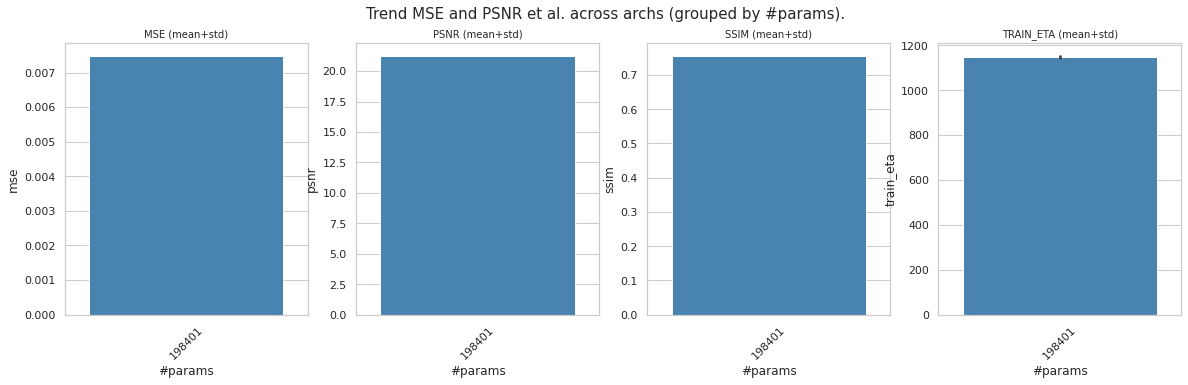

In [ ]:
# %%capture
results_history_sorted_df = results_history_df.sort_values(by=['#params', 'hf', 'hl'])

grid_shape = "(1, 4)" #@param ["(1, 4)", "(4, 1)", "(2, 2)"]
grid_shape = eval(grid_shape)

fig, axes = graphics_bars_mean_std(
    dataframe = results_history_sorted_df,
    y_axes = ("mse", "psnr", "ssim", "train_eta"),
    x_axis = "#params",
    grid_shape = grid_shape,
    figsize = (20, 5))
fig.suptitle('Trend MSE and PSNR et al. across archs (grouped by #params).', fontsize=15)
plt.savefig(f"bar_plot_mse_psnr_et_al_grouped_by_params_train_no_{train_no}.png")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


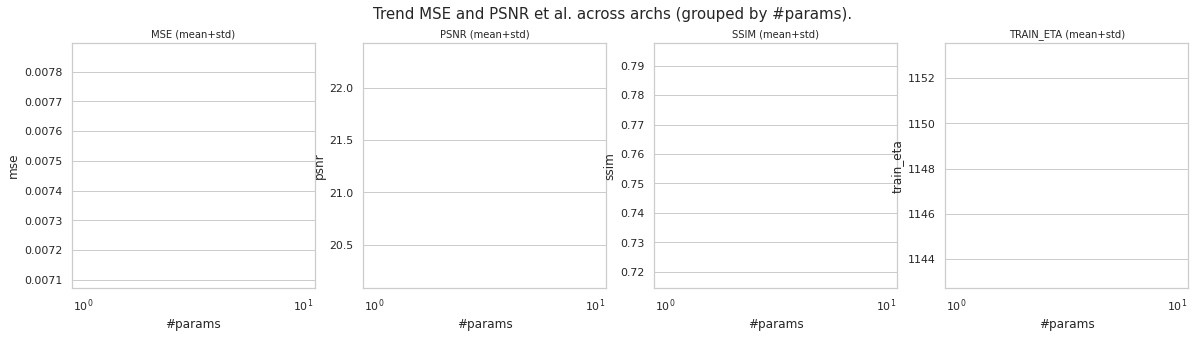

In [ ]:
results_history_sorted_df = results_history_df.sort_values(by=['#params', 'hf', 'hl'])

grid_shape = "(1, 4)" #@param ["(1, 4)", "(4, 1)", "(2, 2)"]
grid_shape = eval(grid_shape)

fig, axes = graphics_pointplot_mean_std(
    dataframe = results_history_sorted_df,
    y_axes = ("mse", "psnr", "ssim", "train_eta"),
    x_axis = "#params",
    grid_shape = grid_shape, 
    figsize = (20, 5))
fig.suptitle('Trend MSE and PSNR et al. across archs (grouped by #params).', fontsize=15)
plt.savefig(f"pointplot_mse_psnr_et_al_grouped_by_params_train_no_{train_no}.png")
plt.subplots_adjust(bottom = 0.2)
plt.show()

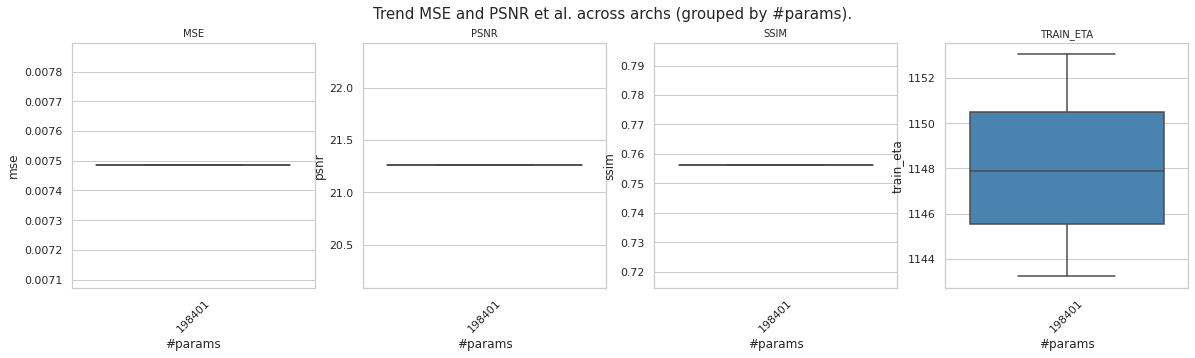

In [ ]:
results_history_sorted_df = results_history_df.sort_values(by=['#params', 'hf', 'hl'])

grid_shape = "(1, 4)" #@param ["(1, 4)", "(4, 1)", "(2, 2)"]
grid_shape = eval(grid_shape)

fig, axes = graphics_boxplot(
    dataframe = results_history_sorted_df,
    y_axes = ("mse", "psnr", "ssim", "train_eta"),
    x_axis = "#params",
    grid_shape = grid_shape,
    figsize = (20, 5))
fig.suptitle('Trend MSE and PSNR et al. across archs (grouped by #params).', fontsize=15)
plt.savefig(f"boxplot_mse_psnr_et_al_grouped_by_params_train_no_{train_no}.png")
plt.subplots_adjust(bottom = 0.2)
plt.show()

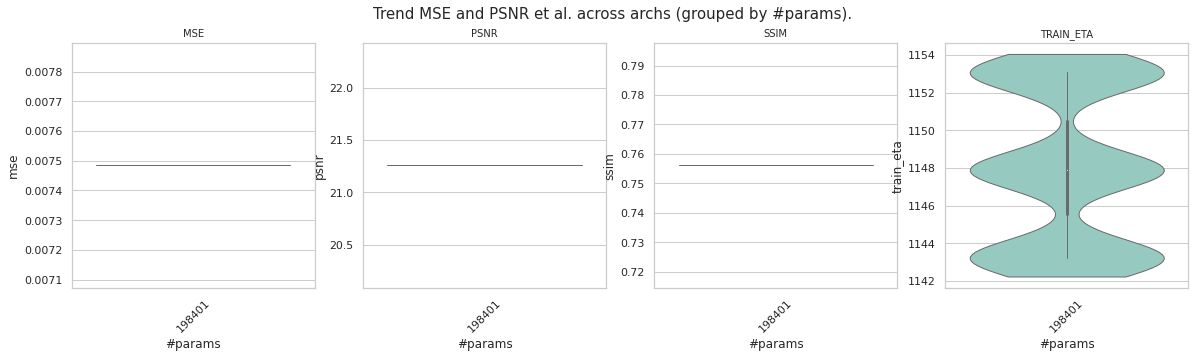

In [ ]:
results_history_sorted_df = results_history_df.sort_values(by=['#params', 'hf', 'hl'])

grid_shape = "(1, 4)" #@param ["(1, 4)", "(4, 1)", "(2, 2)"]
grid_shape = eval(grid_shape)

fig, axes = graphics_violinplot(
    dataframe = results_history_sorted_df,
    y_axes = ("mse", "psnr", "ssim", "train_eta"),
    x_axis = "#params",
    grid_shape = grid_shape,
    figsize = (20, 5))
fig.suptitle('Trend MSE and PSNR et al. across archs (grouped by #params).', fontsize=15)
plt.savefig(f"violinplot_mse_psnr_et_al_grouped_by_params_train_no_{train_no}.png")
plt.subplots_adjust(bottom = 0.2)
plt.show()

Output streaming troncato alle ultime 5000 righe.
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  

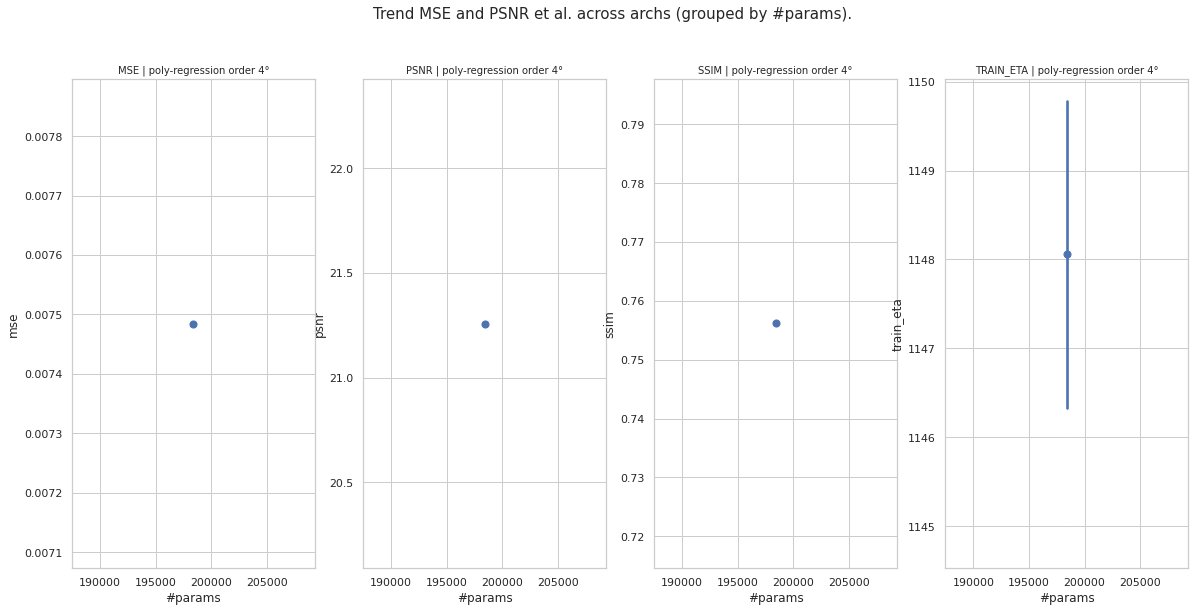

In [ ]:
results_history_sorted_df = results_history_df.sort_values(by=['#params', 'hf', 'hl'])

grid_shape = "(1, 4)" #@param ["(1, 4)", "(4, 1)", "(2, 2)"]
grid_shape = eval(grid_shape)

fig, axes = graphics_regplot_mean_std(
    dataframe = results_history_sorted_df,
    y_axes = ("mse", "psnr", "ssim", "train_eta"),
    x_axis = "#params",
    grid_shape = grid_shape,
    figsize = (20, 10))
fig.suptitle('Trend MSE and PSNR et al. across archs (grouped by #params).', fontsize=15)
plt.savefig(f"regplot_mse_psnr_et_al_grouped_by_params_train_no_{train_no}.png")
plt.subplots_adjust(bottom = 0.2)
plt.show()

### Summary Graph

Output streaming troncato alle ultime 5000 righe.
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  

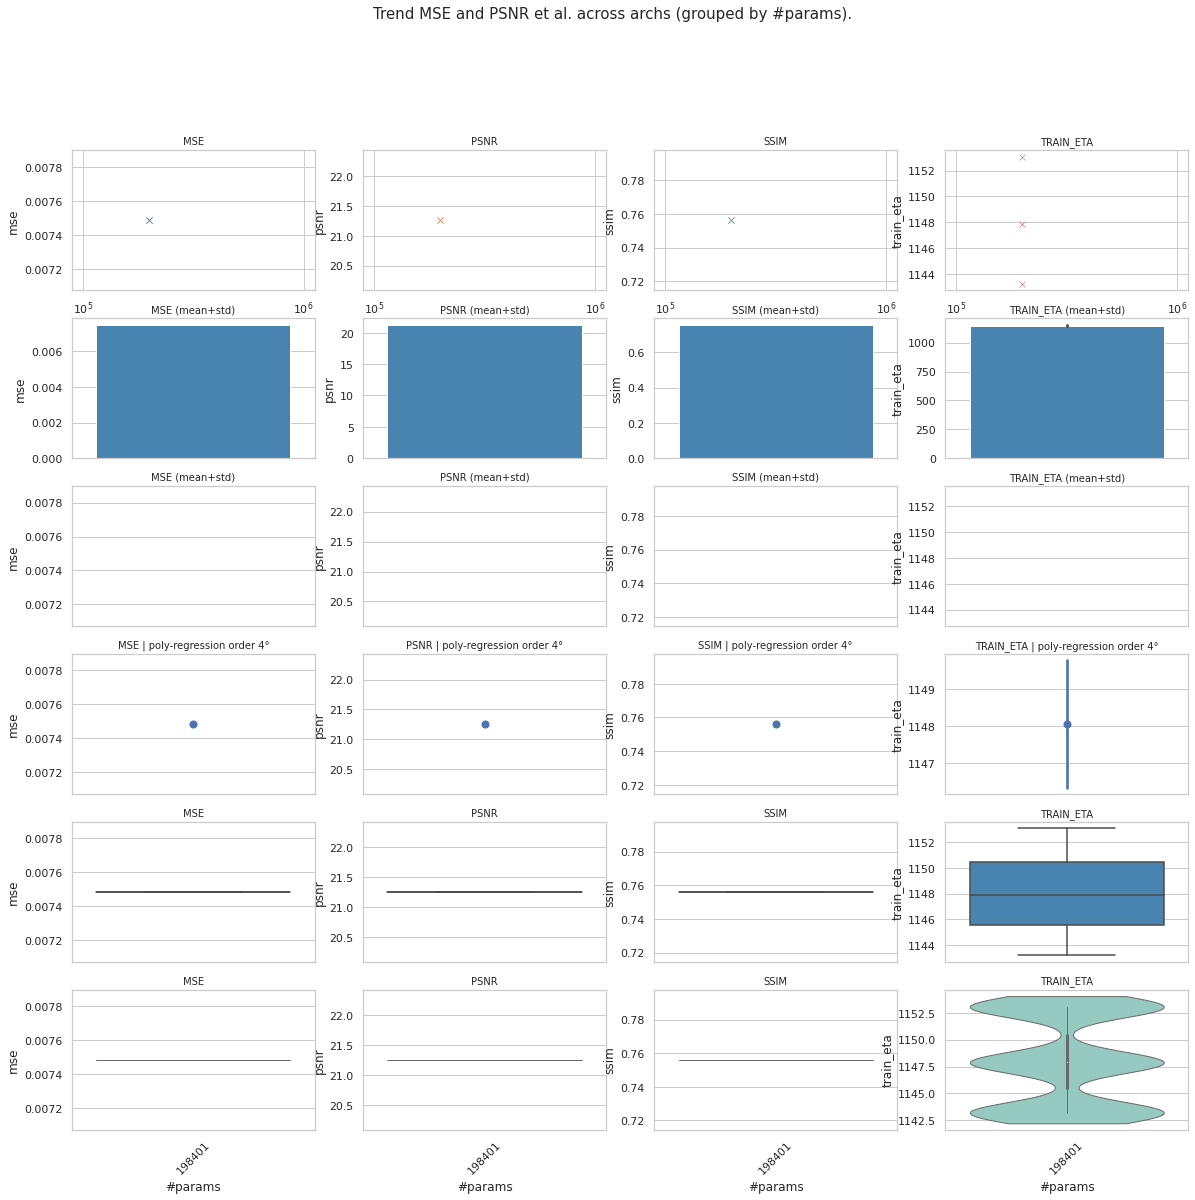

In [ ]:
fig, axes = graphics_bars_pointplot(
    dataframe = results_history_sorted_df,
    y_axes = ("mse", "psnr", "ssim", "train_eta"),
    x_axis = "#params",
    grid_shape = (6, 4),
    figsize = (20, 20), palette="Blues_d",
    show_fig = False,
    title = 'Complex Plot')
fig.suptitle('Trend MSE and PSNR et al. across archs (grouped by #params).', fontsize=15)
plt.savefig(f"complex_mse_psnr_et_al_grouped_by_params_train_no_{train_no}.png")
plt.subplots_adjust(bottom = 0.2)
# plt.tight_layout()
plt.show()

### Download files

In [ ]:
basedir_path = '/content'
print(f"Pictures:")
for path in Path(basedir_path).glob('*.png'):
    target_file = os.path.join(basedir_path, path.name)
    print(f"{target_file}")
    if download_pictures_checkbox:
        files.download(target_file)
    pass

Pictures:
/content/bar_plot_mse_psnr_et_al_grouped_by_params_train_no_2.png
/content/regplot_mse_psnr_et_al_grouped_by_params_train_no_2.png
/content/complex_mse_psnr_et_al_grouped_by_params_train_no_2.png
/content/scatter_plot_train_no_2.png
/content/pointplot_mse_psnr_et_al_grouped_by_params_train_no_2.png
/content/scatterplot_mse_psnr_et_al_vs_no_params_train_no_2.png
/content/boxplot_mse_psnr_et_al_grouped_by_params_train_no_2.png
/content/violinplot_mse_psnr_et_al_grouped_by_params_train_no_2.png


## References

- [FORM](https://colab.research.google.com/notebooks/forms.ipynb#scrollTo=3jKM6GfzlgpS)